                                         COVID DATA

Step-1: Importing libraies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

Step-2: Read the data

In [2]:
df=pd.read_csv("/home/silpa/Downloads/owid-covid-data.csv")


Step-3: To view the first 5 rows

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Step-4: Dropping unwanted columns

In [4]:
df.drop(['new_cases_smoothed','new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True)

Step-5: Renaming the column name

In [5]:
df.rename(columns={'date': 'Date','location':'Country','continent': 'Continent','iso_code':'ISO_code'},inplace=True)

Step-6: List the continent name

In [6]:
continent_lst=list(df.Continent.unique())
continent_lst

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

Step-7: Replacing missing places by constant values

In [7]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)


Step-8: Creating a subset

In [8]:
df3 = df2.groupby(['Date','Country',])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()

Step-9: Replacing the missing values


In [9]:
df3['total_cases'].replace({'missing_value':0},inplace=True)
df3['total_deaths'].replace({'missing_value':0},inplace=True)
df3['total_vaccinations'].replace({'missing_value':0},inplace=True)

Step-10: Finding total countries where total_deaths is greater than 1000000

In [10]:
df4=df3[df3['total_deaths']>1000000]

In [11]:
countries=df4['Country'].unique()
len(countries)
countries_list=list(df4.Country.unique())
countries_list

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

There are 10 countries where total_deaths is greater than 1000000

Step-11: Showing the trend of total_cases, total_deaths, total_vaccinations of these 10 countries using a scatter plot.

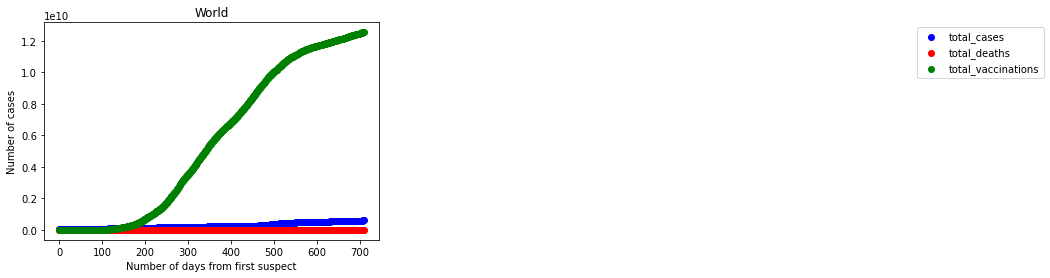

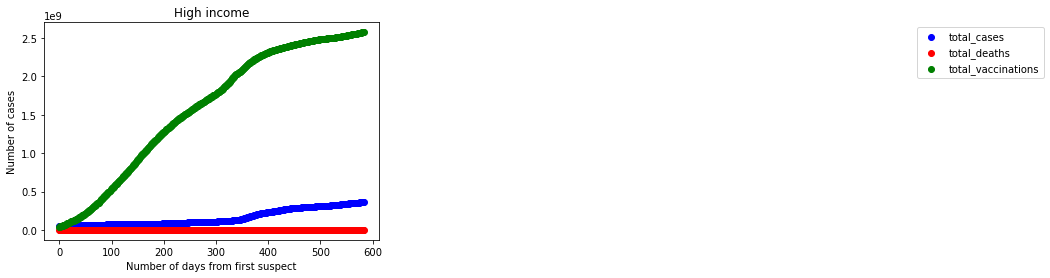

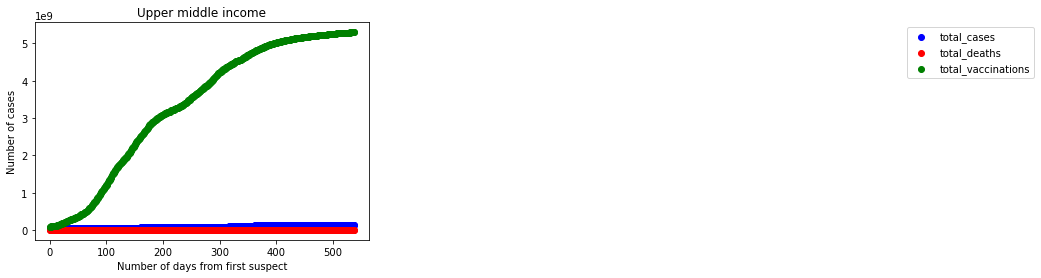

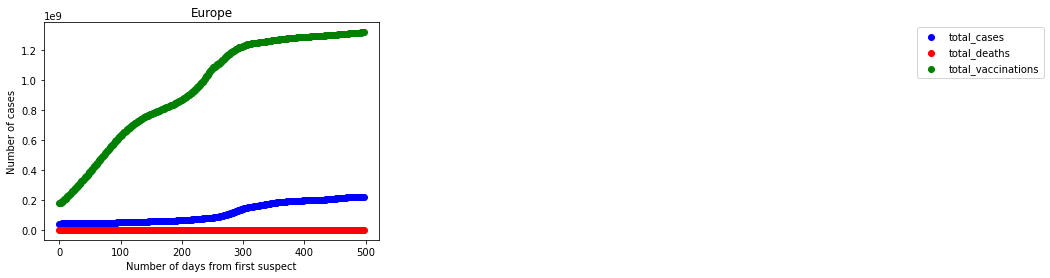

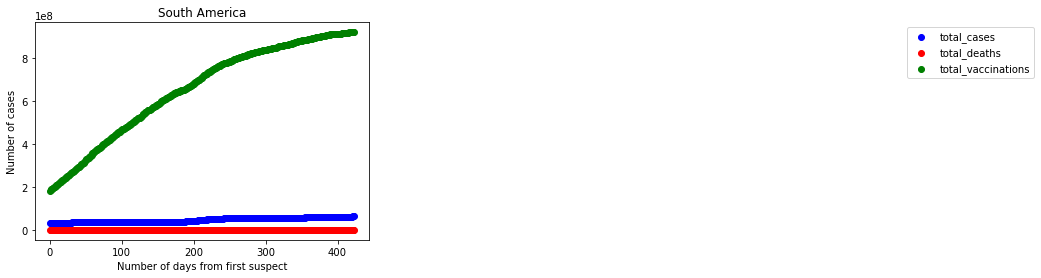

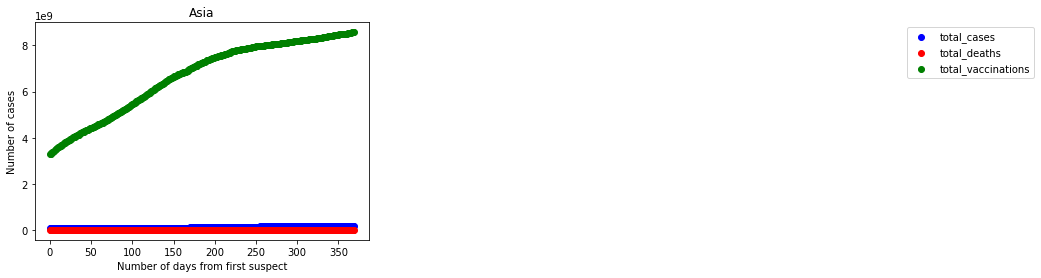

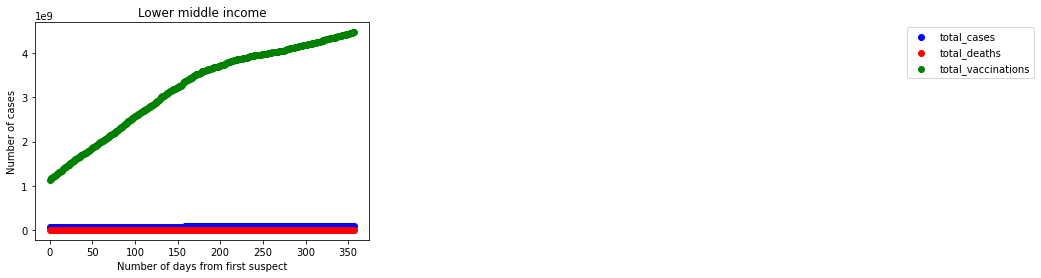

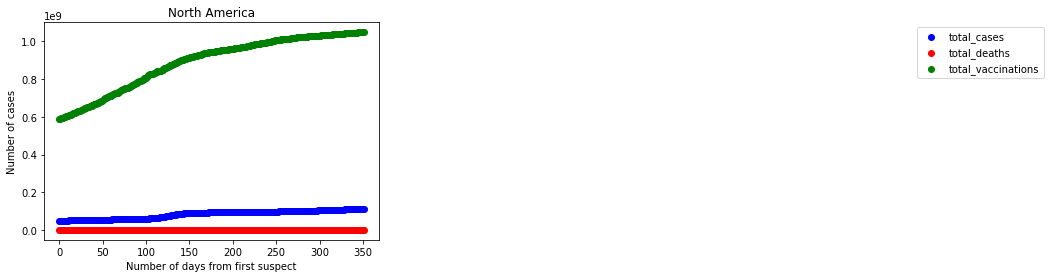

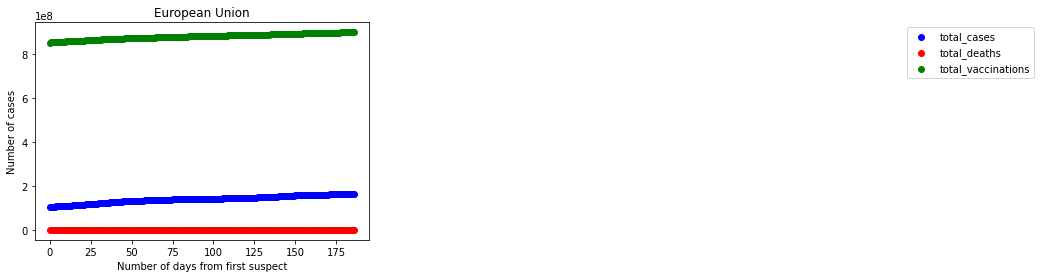

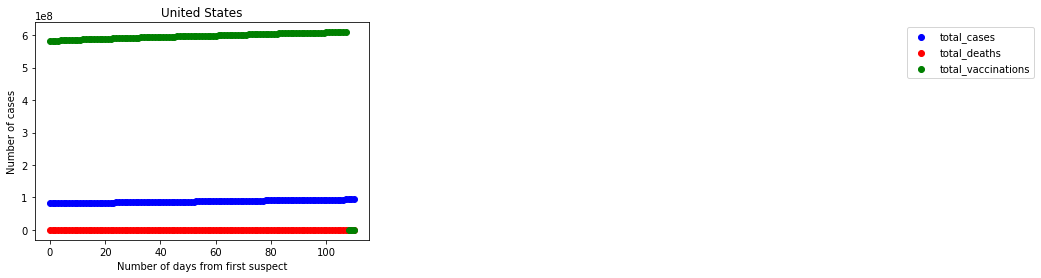

In [12]:
for i in range(0,len(countries)):
    c=df4[df4['Country']==countries[i]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
    plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
    plt.scatter(np.arange(0,len(c)),c['total_vaccinations'],color='green',label='total_vaccinations')
    plt.title(countries[i])
    plt.xlabel("Number of days from first suspect")
    plt.ylabel("Number of cases")
    plt.legend(bbox_to_anchor=(3,1))
    plt.show()
    

Step-12: Grouping by Country

In [13]:
df5=df4.groupby(['Country'])[['Country','total_cases','total_deaths']].sum().reset_index()


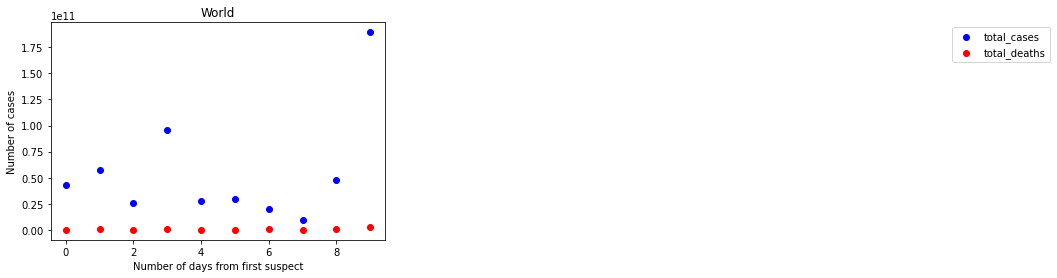

In [14]:
c=df5
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title("World")
plt.xlabel("Number of days from first suspect")
plt.ylabel("Number of cases")
plt.legend(bbox_to_anchor=(3,1))
plt.show()
    


Step-13: Another analysis by Date.Looking at how many dates we have in total where total_deaths is greater than 1000000

In [15]:
date=df4['Date'].unique()
len(date)

710

In [16]:
df6=df4.groupby(['Date'])[['Date','total_deaths','total_cases']].sum().reset_index()

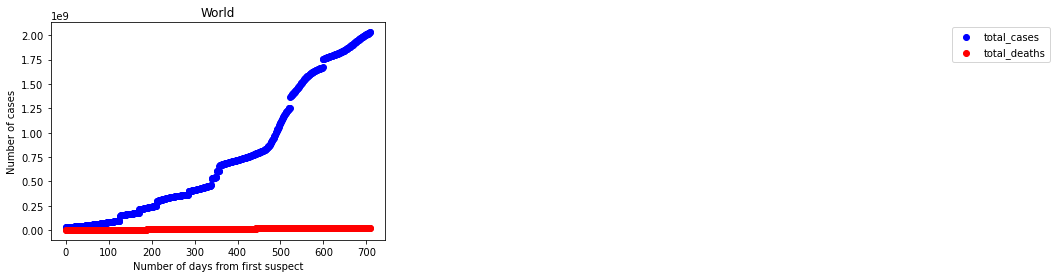

In [17]:
c=df6
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label='total_cases')
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label='total_deaths')
plt.title("World")
plt.xlabel("Number of days from first suspect")
plt.ylabel("Number of cases")
plt.legend(bbox_to_anchor=(3,1))
plt.show()
    
